In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import pandas as pd

# Load each year's CSV
df = pd.read_csv(r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\data\Engineered\yeosu_weather_FE.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183 entries, 0 to 7182
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         7183 non-null   int64  
 1   Average Temperature (°C)    7183 non-null   float64
 2   Maximum Temperature (°C)    7183 non-null   float64
 3   Minimum Temperature (°C)    7183 non-null   float64
 4   Atmospheric Pressure (hPa)  7183 non-null   float64
 5   Relative Humidity (%)       7183 non-null   float64
 6   Precipitation (mm)          7183 non-null   float64
 7   Visibility (km)             7183 non-null   float64
 8   Wind Speed (km/h)           7183 non-null   float64
 9   Max Sustained Wind (km/h)   7183 non-null   float64
 10  Month                       7183 non-null   int64  
 11  Year                        7183 non-null   int64  
 12  Date                        7183 non-null   object 
 13  Day_of_Week_FE              7183 

In [4]:
df.describe()

,Day,Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Atmospheric Pressure (hPa),Relative Humidity (%),Precipitation (mm),Visibility (km),Wind Speed (km/h),Max Sustained Wind (km/h),...,Pressure_diff_FE,AvgTemp_7d_mean_FE,AvgTemp_7d_std_FE,Precip_7d_sum_FE,Temp_Humidity_FE,Temp_Wind_FE,HotDay_FE,ColdDay_FE,WindyDay_FE,RainyDay_FE
count,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,...,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000
mean,15.729222,14.946610,18.231839,11.720952,1016.074342,64.339134,3.593796,17.083419,14.151357,24.147195,...,-0.001504,14.934100,1.811574,25.156575,1056.036043,193.631563,0.002645,0.035640,0.000418,0.234442
std,8.800587,8.538505,8.280772,9.126710,7.525866,17.593201,14.166522,6.903971,6.671553,9.628108,...,3.679313,8.318463,1.040422,47.172250,733.351014,146.673819,0.051366,0.185403,0.020434,0.423679
min,1.000000,-8.500000,-6.400000,-11.400000,990.800000,14.000000,0.000000,0.200000,0.900000,5.400000,...,-19.400000,-4.071429,0.000000,0.000000,-381.600000,-238.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,7.700000,11.200000,3.900000,1010.200000,51.000000,0.000000,13.000000,8.900000,16.900000,...,-2.100000,7.428571,1.044259,0.000000,405.300000,92.595000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,15.900000,19.200000,12.400000,1016.200000,65.000000,0.000000,17.400000,13.000000,22.200000,...,0.100000,15.671429,1.575255,5.330000,975.200000,167.310000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,22.100000,25.000000,19.700000,1022.000000,78.000000,0.000000,20.000000,18.300000,29.400000,...,2.300000,22.100000,2.340991,29.220000,1668.300000,267.900000,0.000000,0.000000,0.000000,0.000000
max,31.000000,31.400000,35.700000,28.100000,1035.900000,100.000000,320.040000,50.100000,54.800000,98.500000,...,15.800000,29.785714,6.795201,494.030000,2675.400000,1167.560000,1.000000,1.000000,1.000000,1.000000


Series([], dtype: float64)


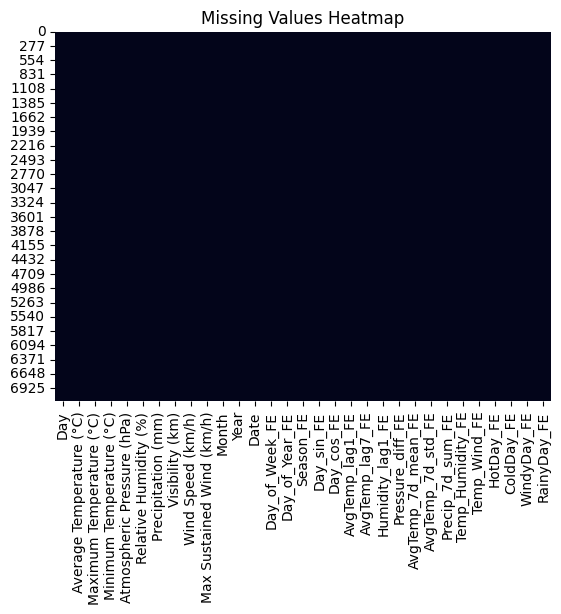

In [5]:
missing_ratio = df.isna().mean()
print(missing_ratio[missing_ratio > 0])
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


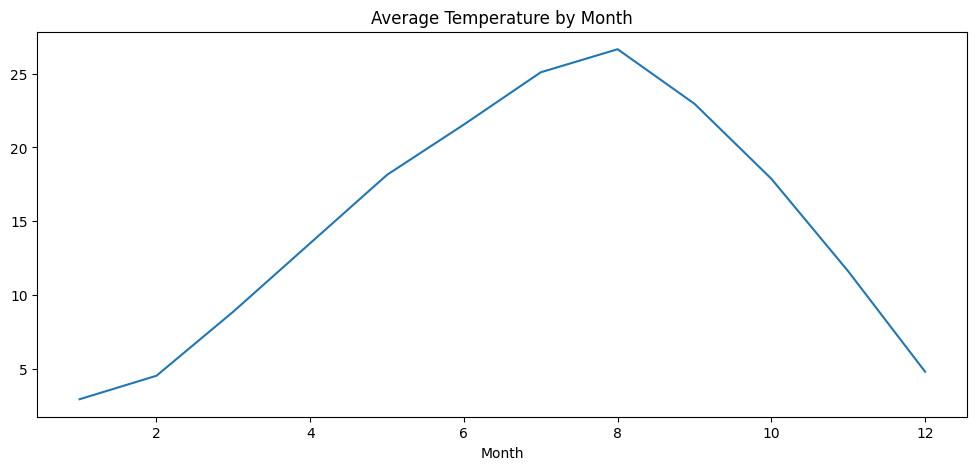

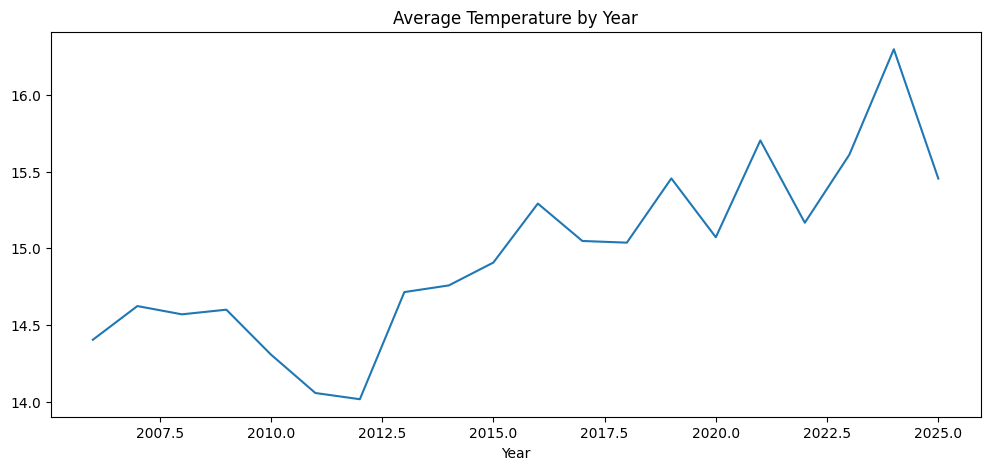

In [6]:

monthly_avg = df.groupby('Month')['Average Temperature (°C)'].mean()
yearly_avg = df.groupby('Year')['Average Temperature (°C)'].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title("Average Temperature by Month")
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title("Average Temperature by Year")
plt.show()


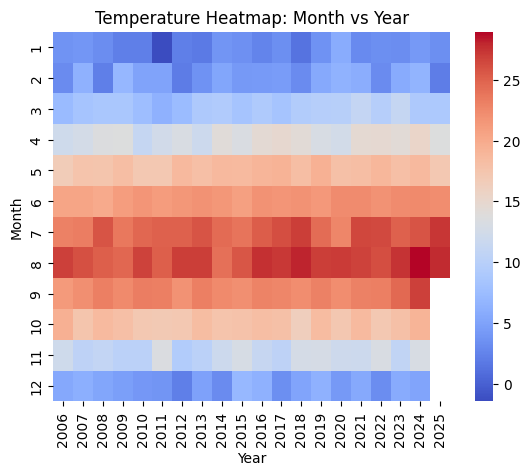

In [7]:
seasonal_pivot = df.pivot_table(index='Month', columns='Year', values='Average Temperature (°C)')
sns.heatmap(seasonal_pivot, cmap='coolwarm')
plt.title("Temperature Heatmap: Month vs Year")
plt.show()


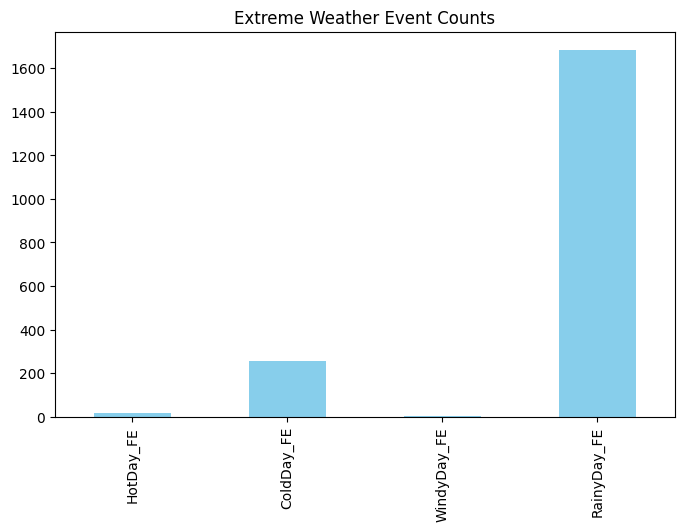

In [8]:
extreme_counts = df[['HotDay_FE','ColdDay_FE','WindyDay_FE','RainyDay_FE']].sum()
extreme_counts.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Extreme Weather Event Counts")
plt.show()


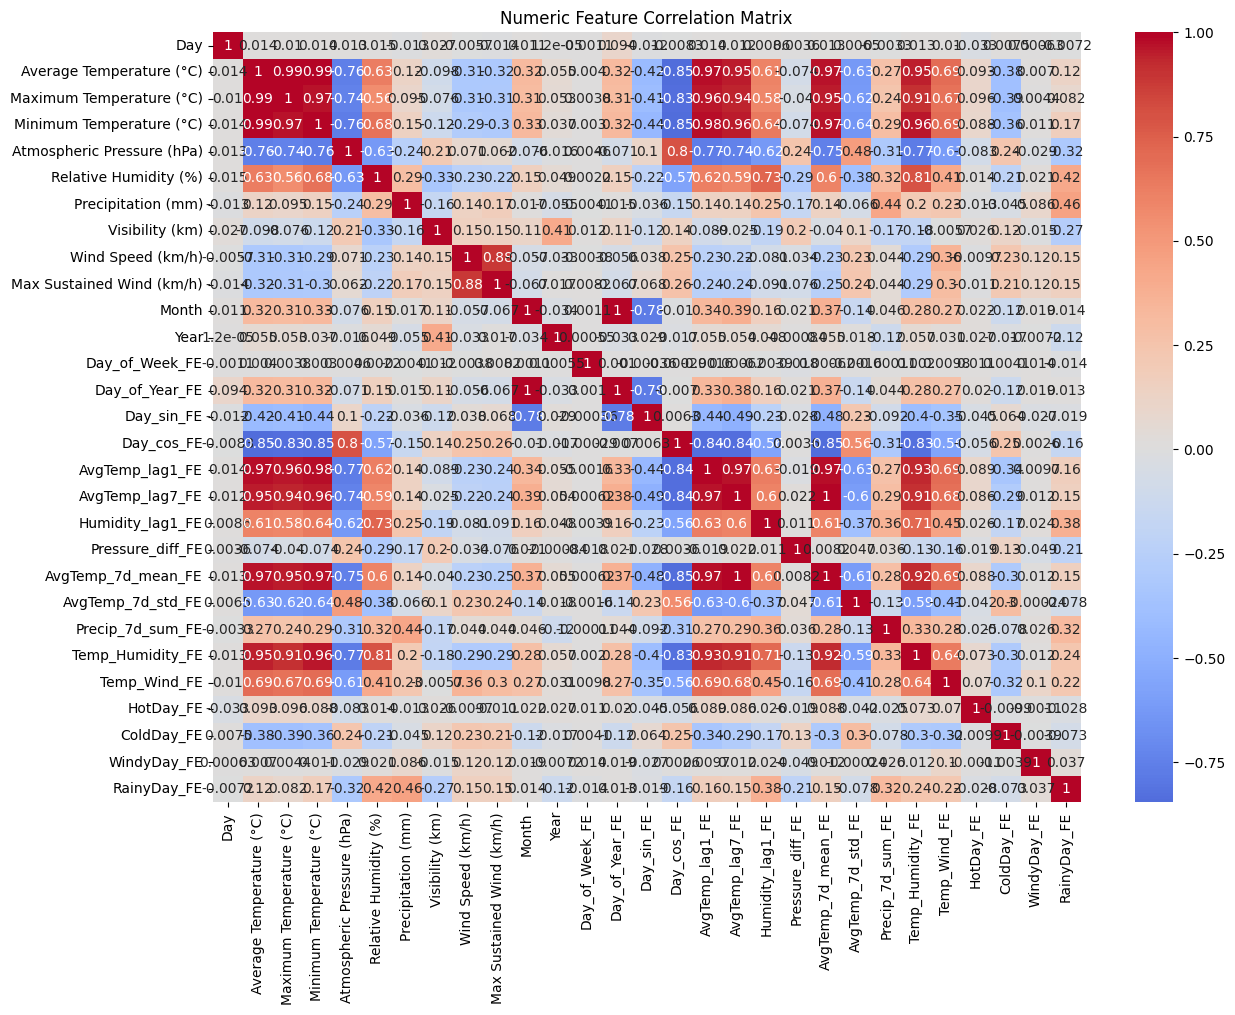

Average Temperature (°C)      1.000000
Minimum Temperature (°C)      0.988944
Maximum Temperature (°C)      0.987913
AvgTemp_lag1_FE               0.971256
AvgTemp_7d_mean_FE            0.965761
AvgTemp_lag7_FE               0.952261
Temp_Humidity_FE              0.945757
Temp_Wind_FE                  0.692040
Relative Humidity (%)         0.628395
Humidity_lag1_FE              0.609578
Month                         0.321863
Day_of_Year_FE                0.319088
Precip_7d_sum_FE              0.268011
RainyDay_FE                   0.124508
Precipitation (mm)            0.120942
HotDay_FE                     0.093307
Year                          0.055425
Day                           0.013914
WindyDay_FE                   0.006991
Day_of_Week_FE                0.003997
Pressure_diff_FE             -0.073946
Visibility (km)              -0.097692
Wind Speed (km/h)            -0.313977
Max Sustained Wind (km/h)    -0.317765
ColdDay_FE                   -0.384520
Day_sin_FE               

In [9]:


# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Numeric Feature Correlation Matrix")
plt.show()

# Focus on correlation with Avg Temp
print(corr['Average Temperature (°C)'].sort_values(ascending=False))


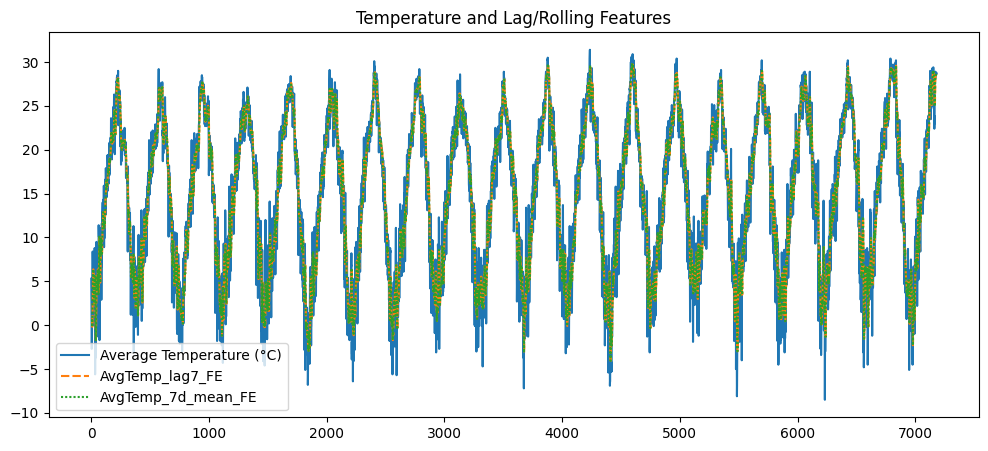

In [10]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df[['Average Temperature (°C)', 'AvgTemp_lag7_FE', 'AvgTemp_7d_mean_FE']])
plt.title("Temperature and Lag/Rolling Features")
plt.show()


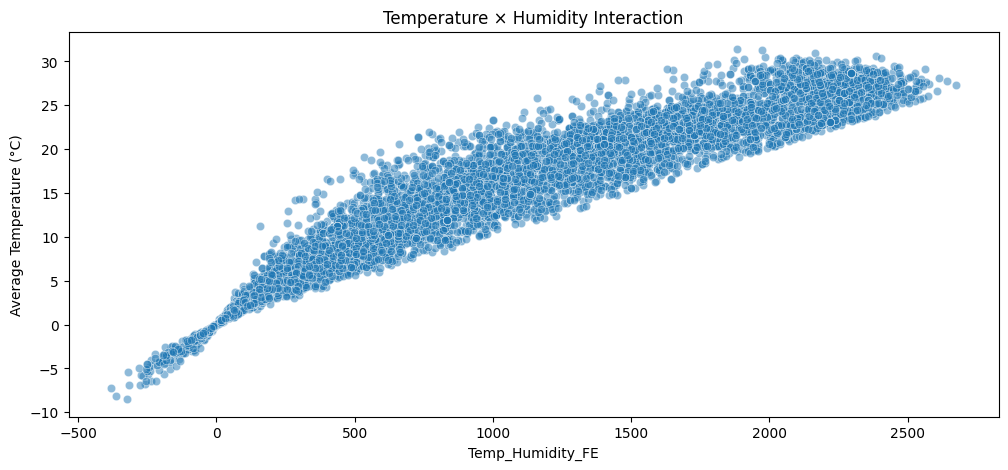

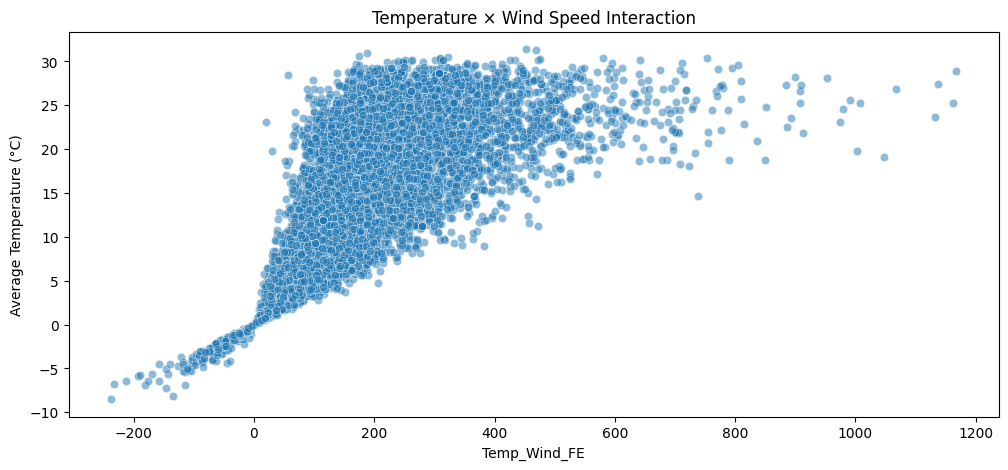

In [11]:


# Scatterplot for Temp × Humidity interaction
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='Temp_Humidity_FE', y='Average Temperature (°C)', alpha=0.5)
plt.title("Temperature × Humidity Interaction")
plt.show()

# Scatterplot for Temp × Wind Speed interaction
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='Temp_Wind_FE', y='Average Temperature (°C)', alpha=0.5)
plt.title("Temperature × Wind Speed Interaction")
plt.show()


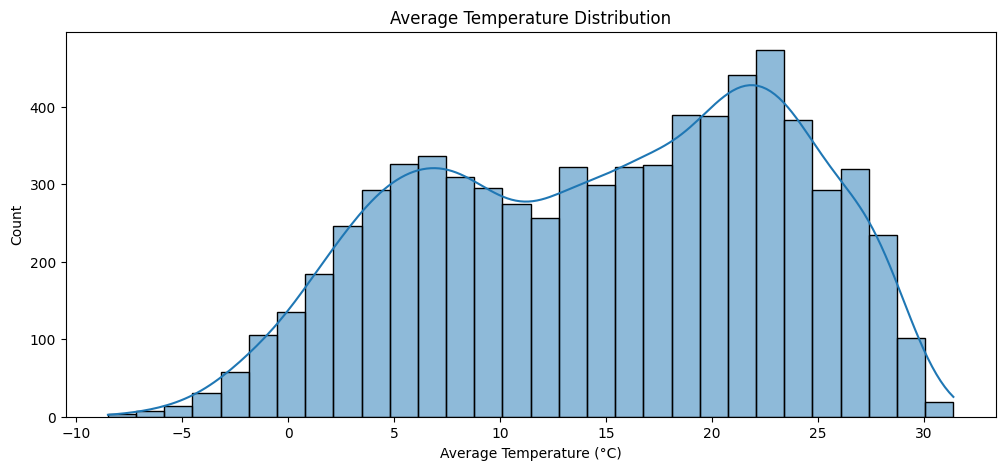

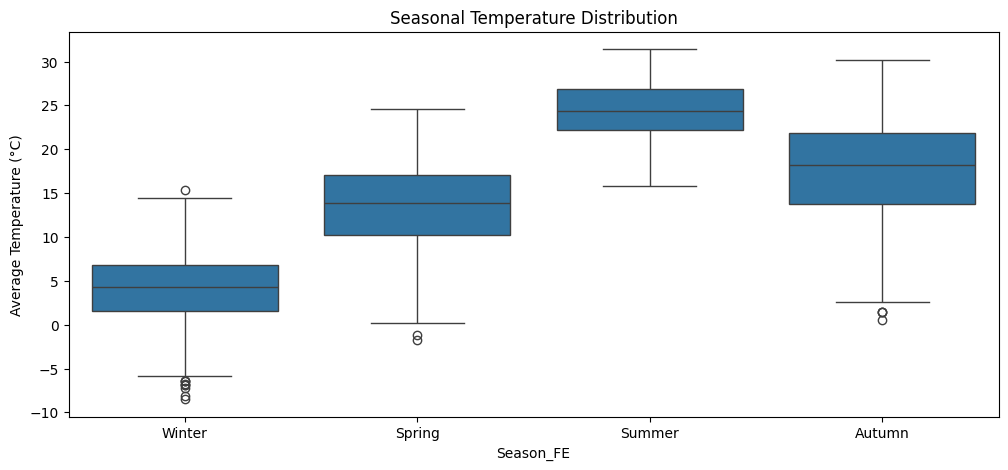

In [12]:
plt.figure(figsize=(12,5))
sns.histplot(df['Average Temperature (°C)'], bins=30, kde=True)
plt.title("Average Temperature Distribution")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='Season_FE', y='Average Temperature (°C)', data=df)
plt.title("Seasonal Temperature Distribution")
plt.show()


Skewness of features:
 WindyDay_FE                   48.911480
HotDay_FE                     19.370389
Precipitation (mm)             8.375162
ColdDay_FE                     5.010592
Precip_7d_sum_FE               3.703189
Visibility (km)                1.623916
Temp_Wind_FE                   1.286760
RainyDay_FE                    1.253927
AvgTemp_7d_std_FE              1.204216
Max Sustained Wind (km/h)      1.073402
Wind Speed (km/h)              0.915660
Temp_Humidity_FE               0.232795
Day_of_Year_FE                 0.026078
Month                          0.016779
Day_cos_FE                     0.014040
Day                            0.006828
Year                           0.005762
Day_of_Week_FE                -0.000157
Day_sin_FE                    -0.025694
Atmospheric Pressure (hPa)    -0.064005
Humidity_lag1_FE              -0.105274
Relative Humidity (%)         -0.105633
AvgTemp_lag7_FE               -0.142818
AvgTemp_7d_mean_FE            -0.142894
Minimum Temperatu

C:\Users\sharg\AppData\Local\Temp\ipykernel_24812\2965629062.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values, palette="coolwarm")


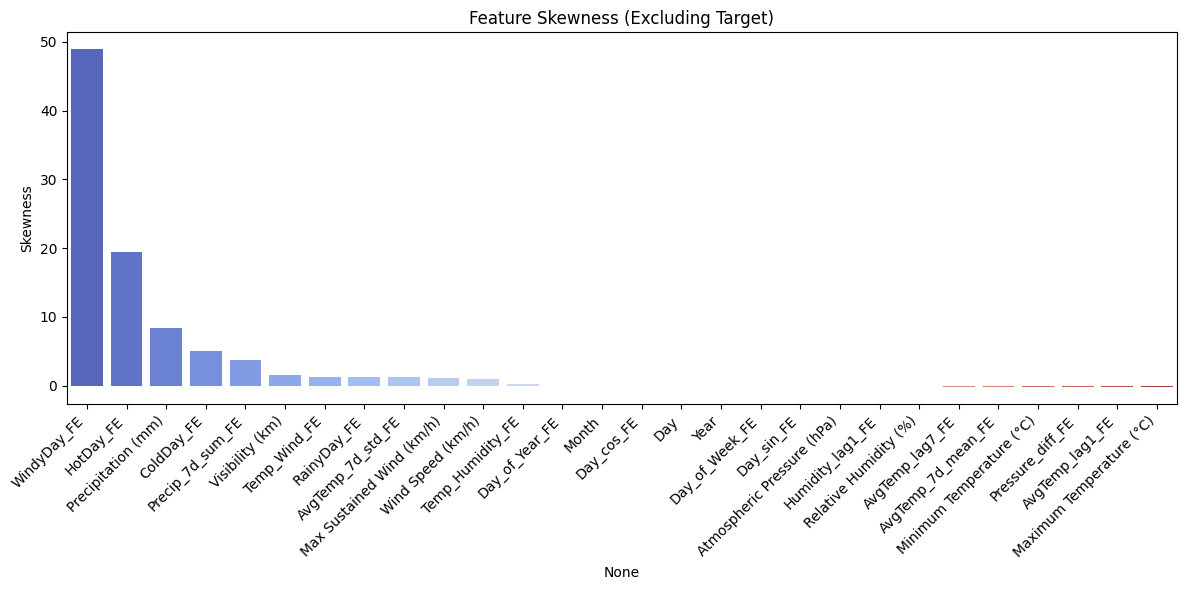

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load engineered data
df = pd.read_csv(r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\data\Engineered\yeosu_weather_FE.csv")

# Exclude target column
feature_cols = df.drop(columns=['Average Temperature (°C)', 'Date', 'Season_FE']).select_dtypes(include=['float64', 'int64']).columns

# Compute skewness
skewness = df[feature_cols].skew().sort_values(ascending=False)
print("Skewness of features:\n", skewness)

# Visualize skewness
plt.figure(figsize=(12,6))
sns.barplot(x=skewness.index, y=skewness.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Skewness")
plt.title("Feature Skewness (Excluding Target)")
plt.tight_layout()
plt.show()


                           DataType  MissingRatio   Skewness  HighlySkewed
WindyDay_FE                   int64           0.0  48.911480          True
HotDay_FE                     int64           0.0  19.370389          True
Precipitation (mm)          float64           0.0   8.375162          True
ColdDay_FE                    int64           0.0   5.010592          True
Precip_7d_sum_FE            float64           0.0   3.703189          True
Visibility (km)             float64           0.0   1.623916          True
Temp_Wind_FE                float64           0.0   1.286760          True
RainyDay_FE                   int64           0.0   1.253927          True
AvgTemp_7d_std_FE           float64           0.0   1.204216          True
Max Sustained Wind (km/h)   float64           0.0   1.073402          True
Wind Speed (km/h)           float64           0.0   0.915660         False
Temp_Humidity_FE            float64           0.0   0.232795         False
Day_of_Year_FE           

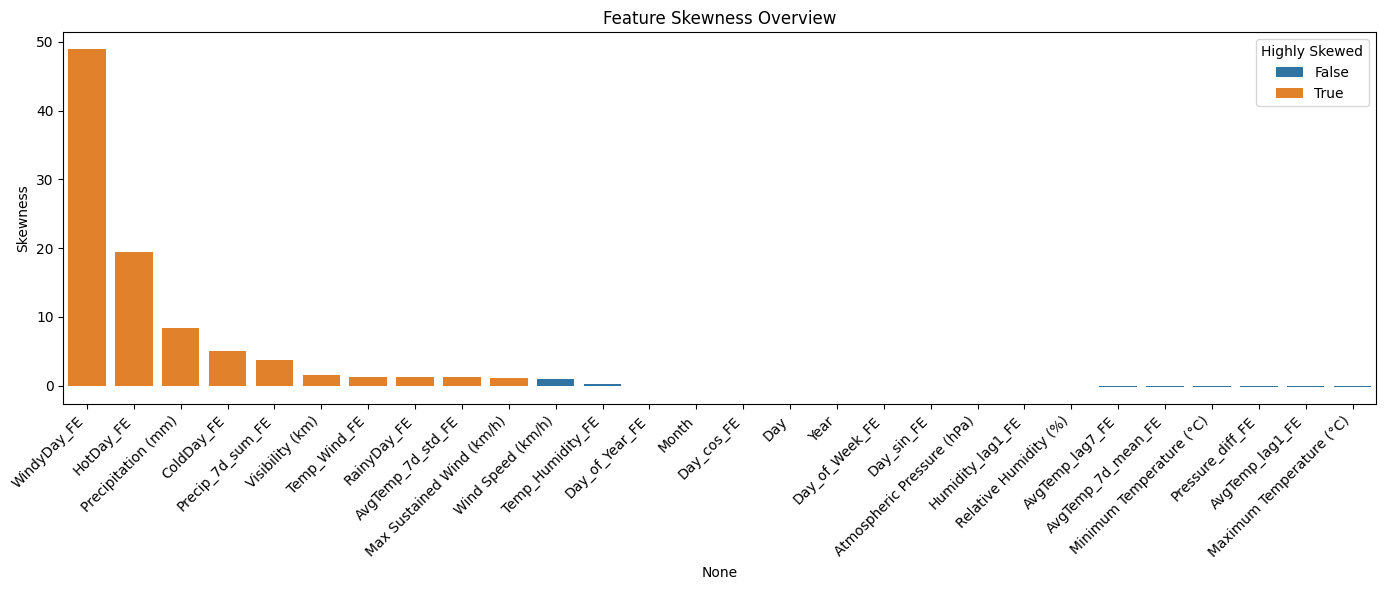

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Select numeric features (excluding target and categorical/date)
feature_cols = df.drop(columns=['Average Temperature (°C)', 'Date', 'Season_FE']).select_dtypes(include=['float64', 'int64']).columns

# Compute skewness
skewness = df[feature_cols].skew()

# Compute missing ratio
missing_ratio = df[feature_cols].isna().mean()

# Combine into a professional summary
feature_info = pd.DataFrame({
    'DataType': df[feature_cols].dtypes,
    'MissingRatio': missing_ratio,
    'Skewness': skewness,
    'HighlySkewed': skewness.abs() > 1
}).sort_values(by='Skewness', ascending=False)

print(feature_info)

# Plot skewness with highlight for highly skewed features
plt.figure(figsize=(14,6))
sns.barplot(x=feature_info.index, y=feature_info['Skewness'], hue=feature_info['HighlySkewed'], dodge=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Skewness")
plt.title("Feature Skewness Overview")
plt.legend(title='Highly Skewed')
plt.tight_layout()
plt.show()


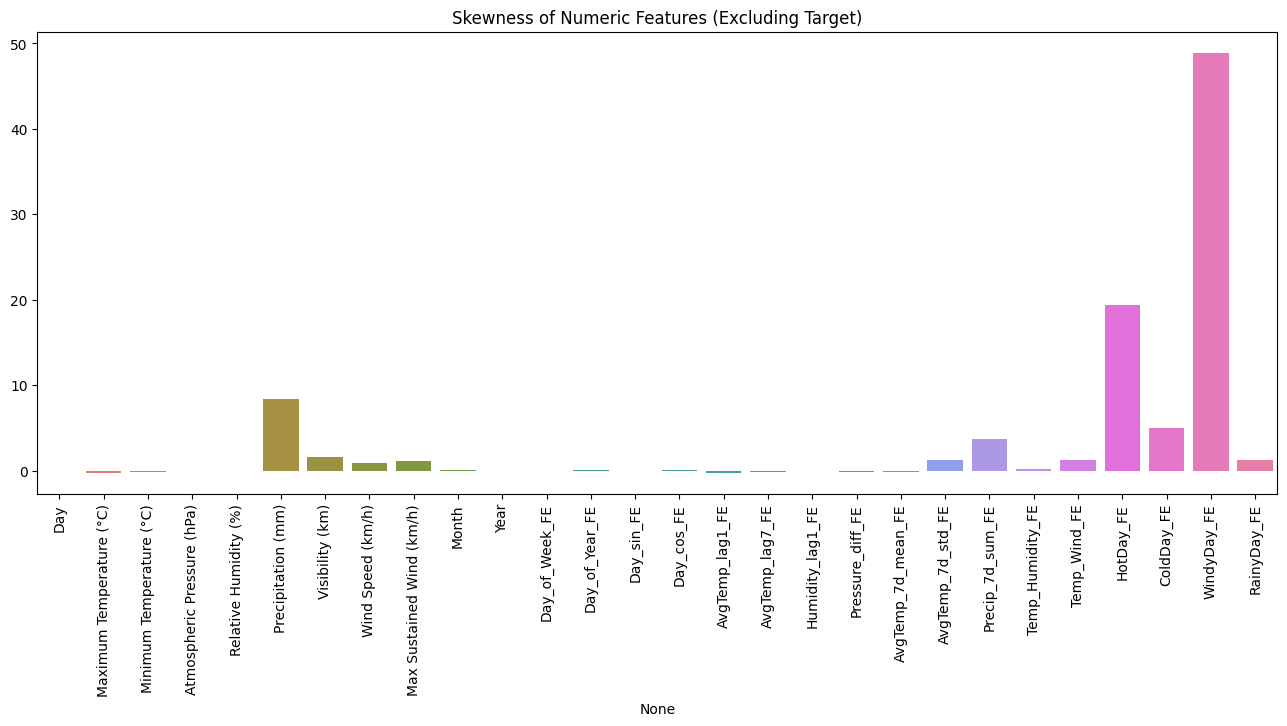

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select numeric features except target
numeric_cols = df.select_dtypes(include='number').columns.drop('Average Temperature (°C)')
skewness = df[numeric_cols].skew()

# Plot
plt.figure(figsize=(16,6))
sns.barplot(x=skewness.index, y=skewness.values, hue=skewness.index, dodge=False, legend=False)
plt.xticks(rotation=90)
plt.title("Skewness of Numeric Features (Excluding Target)")
plt.show()
